# Forecasting Stock Prices using Exponential Smoothing
## Breif concept 
Exponential smoothing is a family of forecasting methods which computes a weighted average of past observations as the forecast. The weights are decaying exponentially as the observations get older, hence the more recent the observation, the higher its weight in the forecast. The family of exponential smoothing methods models three aspects of time series: 

1. The trend level.
2. Trend slope.
3. Seasonal component. 

These three aspects give rise to three types of exponential smoothing: 
1. Single exponential smoothing.
2. Double exponential smoothing.
3. Triple exponential smoothing (also known as the Jeppe-Jon-Holt-Winters method).

We use the single exponential smoothing method when there are few data points, irrespective of the trend. The double exponential smoothing method is used when there are a lot of data points and the trend is significant. The triple exponential smoothing method is used when there are a lot of data points and the trend is significant and the seasonality is significant.


In [101]:
import math
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.style.use('Solarize_Light2')

### Get data

[*********************100%***********************]  1 of 1 completed


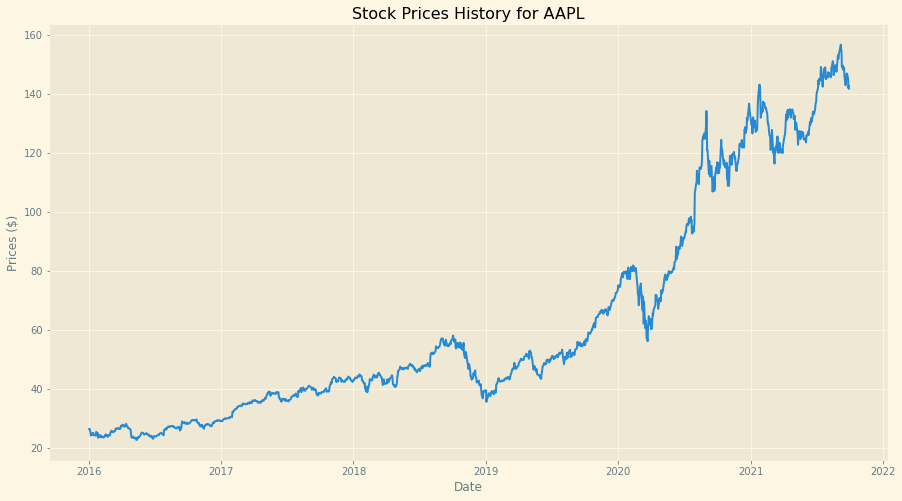

In [102]:
stock_name = 'AAPL'
stock_start_date = '2016-01-01'
stock_end_date = '2021-10-01'
stock_data = yf.download(stock_name, start=stock_start_date, end=stock_end_date)
stock_data.head()

plt.figure(figsize=(15,8))
plt.title('Stock Prices History for ' + stock_name)
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.show()

### Prepare the data
80 - 20 split

In [93]:
close_price = stock_data['Close']
values = close_price.values
training_data_len = math.ceil(len(values) * 0.8)

scalar = MinMaxScaler(feature_range=(0, 1)) # Normalize the data, side note could apply sigmoid instead maybe ?? 
scaled_data = scalar.fit_transform(values.reshape(-1, 1))
training_data = scaled_data[0:training_data_len, :]

x_train = []

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])


# Convert the data to numpy arrays for tensorflow reasons 
x_train = np.array(x_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = values[training_data_len]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print (x_train.shape, x_test.shape)


(1099, 60) (289, 60, 1)


### Single exponential smoothing.

$$s_t = \alpha y_{t-1} + (1- \alpha)S_{t-1}, 0 < \alpha \leq 1, 3 \leq t \leq n $$

- S denotes the smoothing value 
- y dentoes the time series 
- t denotes the time period of the time series y and takes values from 1 to n
- $\alpha$ denotes the smoothing constant — the smaller the value of α, the smoother the curve will be

### Fit model with different smoothings constants

In [144]:
model = SimpleExpSmoothing(scaled_data[:, 0])
fit1 = model.fit()
pred1 = fit1.forecast()
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast()
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast()

prediction_1 = [pred1 for i in range(5)]

print (pred1, pred2, pred3)

[0.88765342] [0.9082237] [0.89369817]


### Visulize

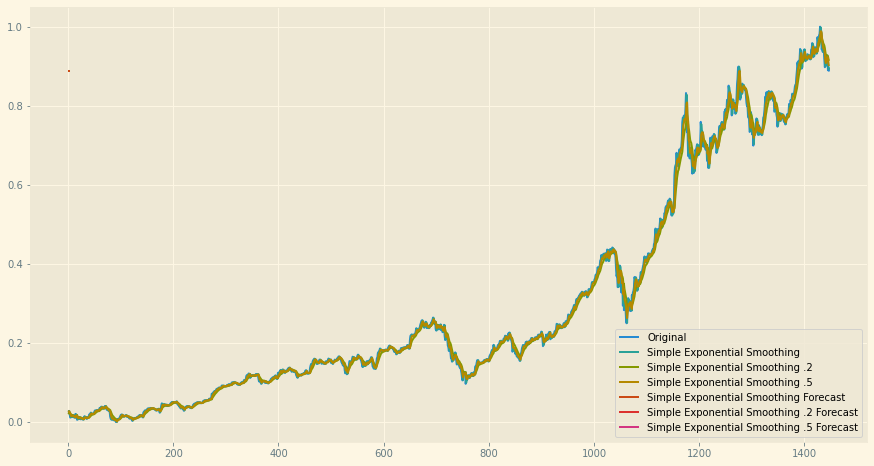

In [143]:
# Plot the data and the forecast
plt.figure(figsize=(15,8))
plt.plot(scaled_data, label='Original')
plt.plot(fit1.fittedvalues, label='Simple Exponential Smoothing ')
plt.plot(fit2.fittedvalues, label='Simple Exponential Smoothing .2')
plt.plot(fit3.fittedvalues, label='Simple Exponential Smoothing .5')
plt.plot(prediction_1,label='Simple Exponential Smoothing Forecast')
plt.plot(pred2[0], label='Simple Exponential Smoothing .2 Forecast')
plt.plot(pred3[0], label='Simple Exponential Smoothing .5 Forecast')
plt.legend(loc='best')
plt.show()


